<a href="https://colab.research.google.com/github/prof-nuduls/EE628HW/blob/main/EE628_HW4_Miller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [2]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

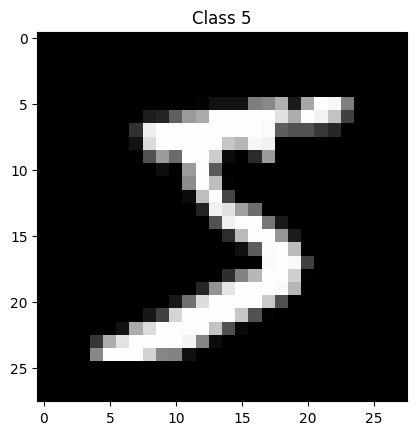

In [4]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [6]:
number_of_classes = 10

Y_train = to_categorical(y_train, number_of_classes)
Y_test = to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [7]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Pooling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                        

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [9]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
 height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()


In [10]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5,
 validation_data=test_generator, validation_steps=10000//64)

<ipython-input-10-8a9d8424f171>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5,


Epoch 1/5
937/937 [==============================] - 185s 192ms/step - loss: 0.1974 - accuracy: 0.9376 - val_loss: 0.0254 - val_accuracy: 0.9918
Epoch 2/5
937/937 [==============================] - 173s 184ms/step - loss: 0.0649 - accuracy: 0.9795 - val_loss: 0.0210 - val_accuracy: 0.9926
Epoch 3/5
937/937 [==============================] - 171s 183ms/step - loss: 0.0456 - accuracy: 0.9860 - val_loss: 0.0194 - val_accuracy: 0.9942
Epoch 4/5
937/937 [==============================] - 168s 179ms/step - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0176 - val_accuracy: 0.9947
Epoch 5/5
937/937 [==============================] - 172s 184ms/step - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.0157 - val_accuracy: 0.9950


In [11]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 7s 22ms/step - loss: 0.0157 - accuracy: 0.9950

Test accuracy:  0.9950000047683716


In [12]:
predictions = model.predict(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)


313/313 [==============================] - 8s 24ms/step


In [13]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


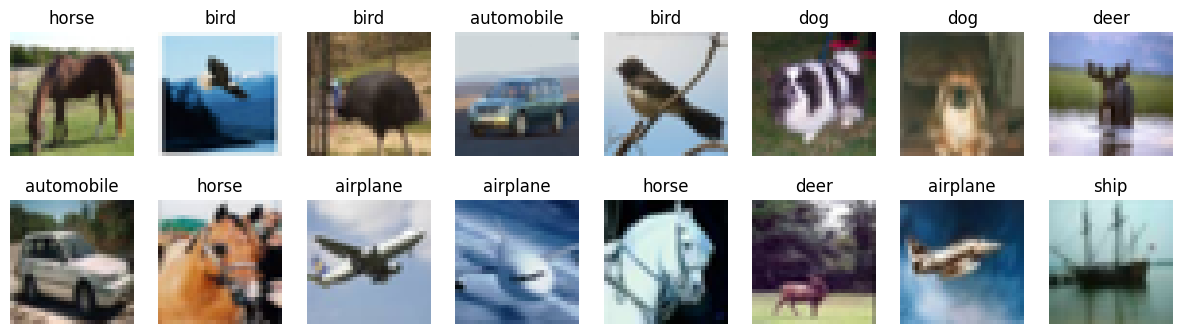

In [14]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",  "dog", "frog", "horse", "ship", "truck"]

# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0, len(y_train))
    ax = fig.add_subplot(rows, cols, i * rows + j + 1)
    ax.grid('off')
    ax.axis('off')
    ax.imshow(x_train[random_index, :])
    ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [15]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers import LeakyReLU

In [16]:
new_model = Sequential()

new_model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
new_model.add(Activation('relu'))
BatchNormalization(axis=-1)
new_model.add(Conv2D(32, (3, 3)))
new_model.add(Activation('LeakyReLU'))
new_model.add(MaxPooling2D(pool_size=(2,2)))
new_model.add(Activation('relu'))
new_model.add(Dropout(0.2))
new_model.add(Flatten())
new_model.add(Dense(10))
new_model.add(Activation('softmax'))
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 activation_8 (Activation)   (None, 12, 12, 32)        0         
                                                      

In [17]:
new_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [18]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
 height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()


In [19]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

new_model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5,
 validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5


<ipython-input-19-cbaba066ac66>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  new_model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5,


937/937 [==============================] - 118s 125ms/step - loss: 0.3369 - accuracy: 0.8969 - val_loss: 0.0592 - val_accuracy: 0.9824
Epoch 2/5
937/937 [==============================] - 115s 123ms/step - loss: 0.1345 - accuracy: 0.9599 - val_loss: 0.0448 - val_accuracy: 0.9851
Epoch 3/5
937/937 [==============================] - 111s 119ms/step - loss: 0.1072 - accuracy: 0.9683 - val_loss: 0.0320 - val_accuracy: 0.9901
Epoch 4/5
937/937 [==============================] - 111s 119ms/step - loss: 0.0923 - accuracy: 0.9715 - val_loss: 0.0455 - val_accuracy: 0.9867
Epoch 5/5
937/937 [==============================] - 112s 120ms/step - loss: 0.0846 - accuracy: 0.9739 - val_loss: 0.0382 - val_accuracy: 0.9875


In [20]:
score = new_model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 4s 14ms/step - loss: 0.0381 - accuracy: 0.9875

Test accuracy:  0.987500011920929
